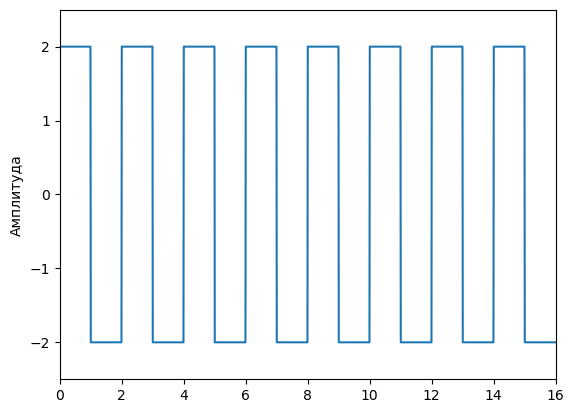

In [199]:
from matplotlib import pyplot as plt
from math import floor
import numpy as np


def x(t):
    return 2 if floor(t) % 2 == 0 else -2


x_values = np.arange(0, 16, 0.01)
y_values = [x(t) for t in x_values]

plt.plot(x_values, y_values)
plt.axis((0, 16, -2.5, 2.5))
plt.ylabel("Амплитуда")
plt.show()


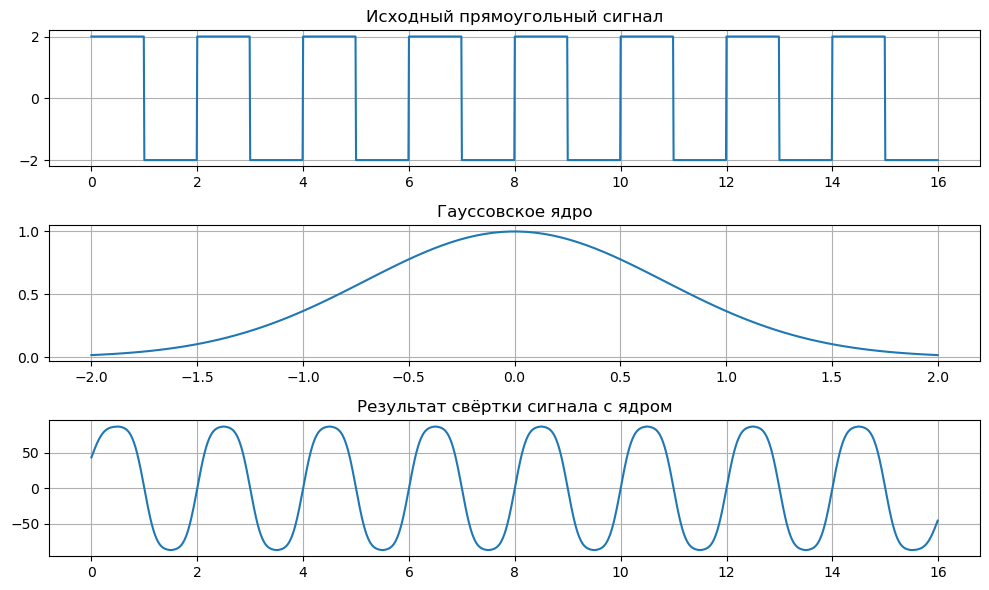

In [200]:
def gaussian_kernel(x, A=1):
    return A * np.exp(-x ** 2)


kernel_size = 100
kernel_x = np.linspace(-2, 2, kernel_size)
kernel_values = [gaussian_kernel(t) for t in kernel_x]

convolution_result = np.convolve(y_values, kernel_values, mode='same')

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(x_values, y_values)
plt.title("Исходный прямоугольный сигнал")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(kernel_x, kernel_values)
plt.title("Гауссовское ядро")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(x_values, convolution_result)
plt.title("Результат свёртки сигнала с ядром")
plt.grid()

plt.tight_layout()
plt.show()

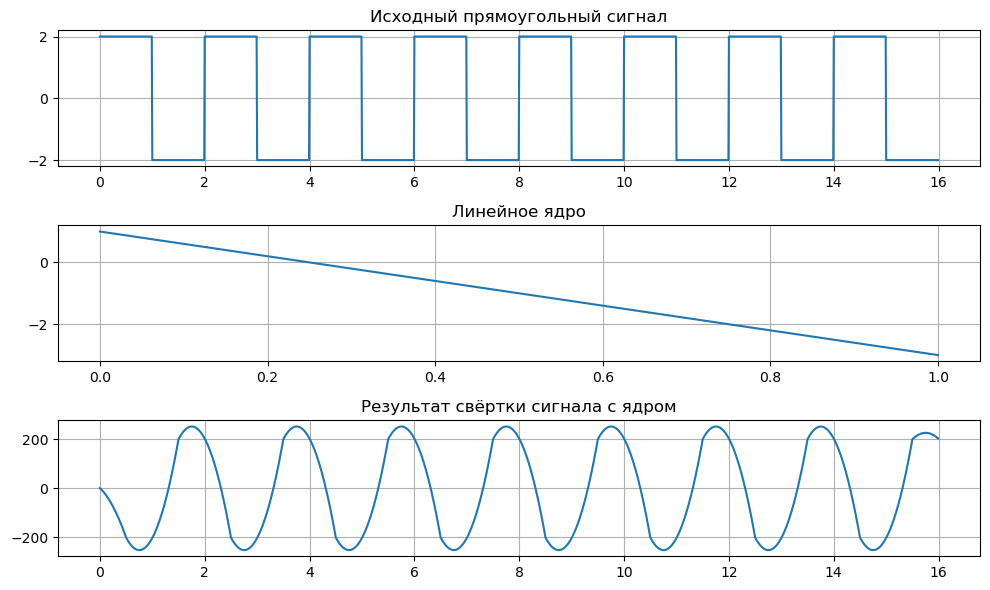

In [201]:
def linear_kernel(x):
    return 1 - 4 * x


kernel_size = 100
kernel_x = np.linspace(0, 1, kernel_size)
kernel_values = [linear_kernel(t) for t in kernel_x]

convolution_result = np.convolve(y_values, kernel_values, mode='same')

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(x_values, y_values)
plt.title("Исходный прямоугольный сигнал")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(kernel_x, kernel_values)
plt.title("Линейное ядро")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(x_values, convolution_result)
plt.title("Результат свёртки сигнала с ядром")
plt.grid()

plt.tight_layout()
plt.show()

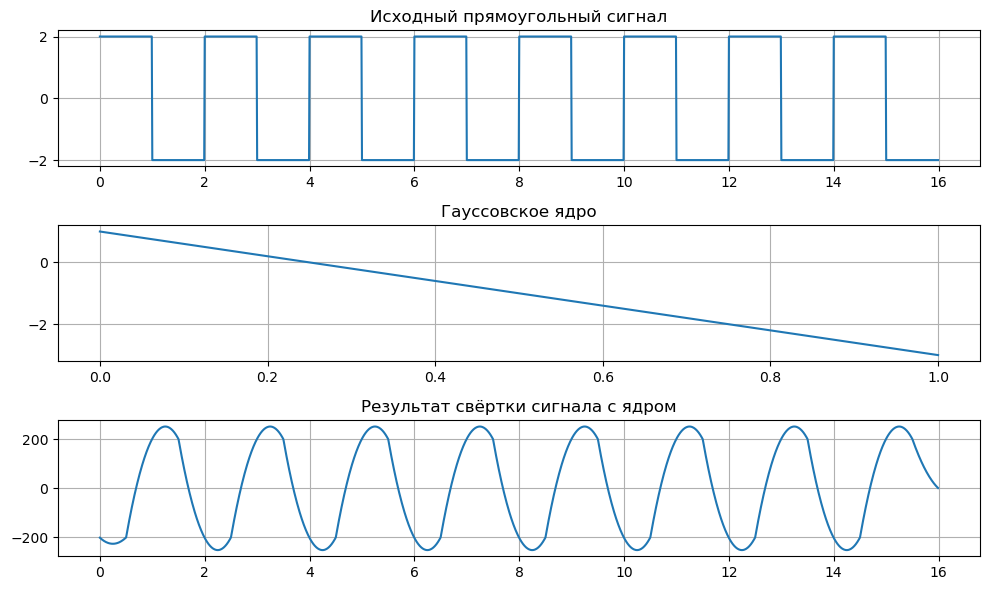

In [202]:
def my_convolution(signal, kernel):
    signal_size = len(signal)
    kernel_size = len(kernel)
    pad_size = kernel_size // 2

    padded_signal = [0] * pad_size + signal + [0] * pad_size

    result = []
    for i in range(signal_size):
        value = 0
        for j in range(kernel_size):
            value += padded_signal[i + j] * kernel[j]
        result.append(value)

    return result


convolution_result = my_convolution(y_values, kernel_values)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(x_values, y_values)
plt.title("Исходный прямоугольный сигнал")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(kernel_x, kernel_values)
plt.title("Линейное ядро")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(x_values, convolution_result)
plt.title("Результат свёртки сигнала с ядром")
plt.grid()

plt.tight_layout()
plt.show()

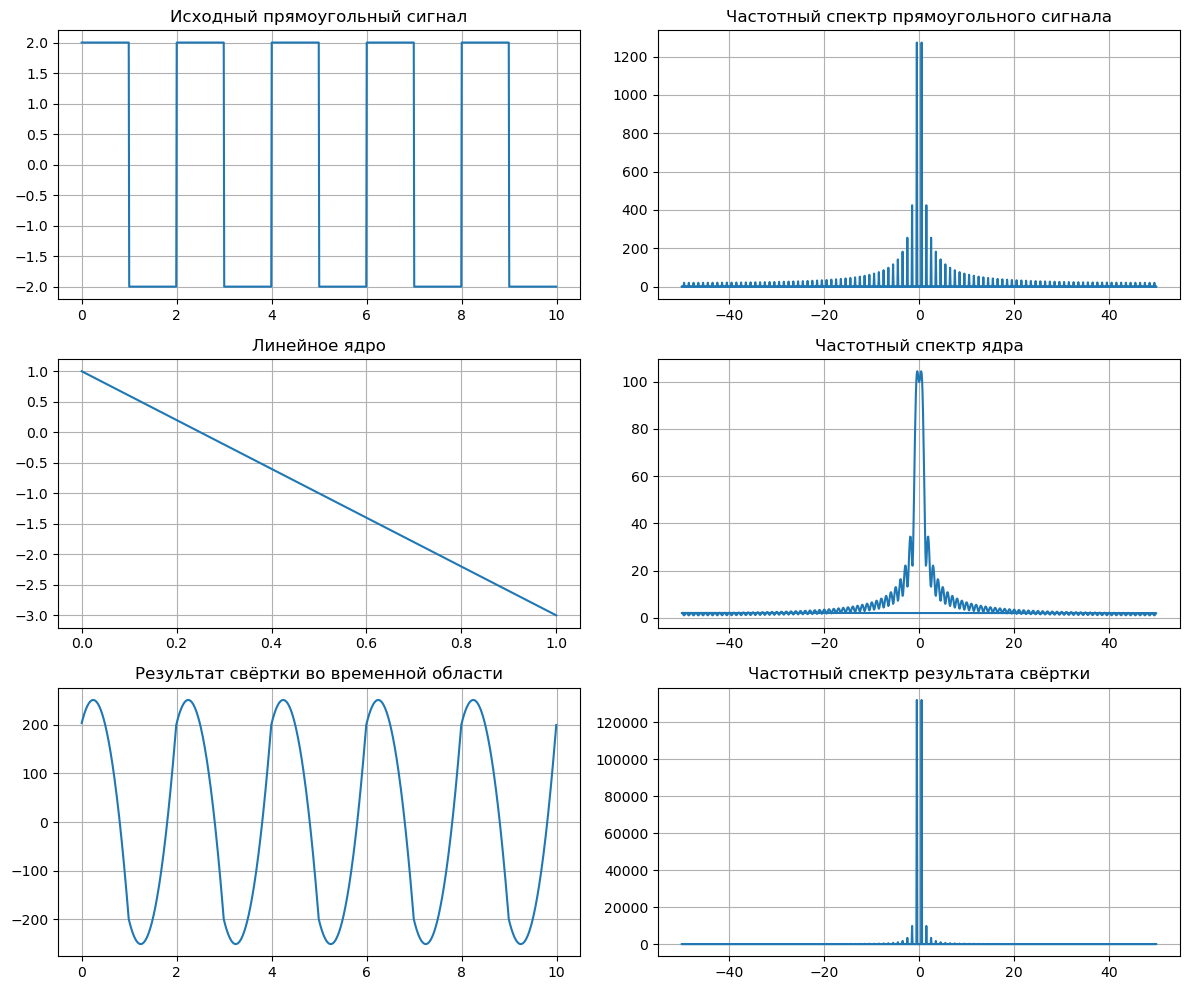

In [203]:
import numpy as np
import scipy.fft as fft
from matplotlib import pyplot as plt
from math import floor

x_values = np.arange(0, 10, 0.01)
y_values = [x(t) for t in x_values]

kernel_size = 100
kernel_x = np.linspace(0, 1, kernel_size)
kernel_values = [linear_kernel(t) for t in kernel_x]

kernel_values_padded = np.zeros(len(y_values))
kernel_values_padded[:kernel_size] = kernel_values

fft_signal = fft.fft(y_values)
fft_kernel = fft.fft(kernel_values_padded)

convolution_freq = np.multiply(fft_signal, fft_kernel)
convolution_result = fft.ifft(convolution_freq).real

freqs = fft.fftfreq(len(y_values), d=0.01)

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_values, y_values)
plt.title("Исходный прямоугольный сигнал")
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(freqs, np.abs(fft_signal))
plt.title("Частотный спектр прямоугольного сигнала")
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(kernel_x, kernel_values)
plt.title("Линейное ядро")
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(freqs, np.abs(fft_kernel))
plt.title("Частотный спектр ядра")
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(x_values, convolution_result)
plt.title("Результат свёртки во временной области")
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(freqs, np.abs(convolution_freq))
plt.title("Частотный спектр результата свёртки")
plt.grid()

plt.tight_layout()
plt.show()


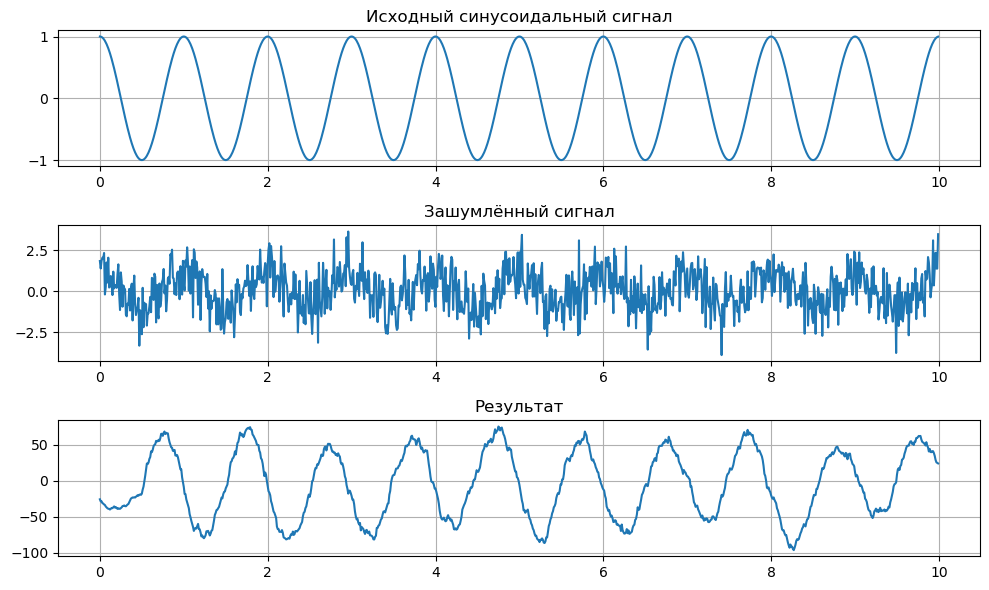

In [204]:
from numpy import pi, cos


def w(frequency):
    return 2 * pi * frequency


freq_sin = 1


def x(t):
    return cos(w(freq_sin) * t)


def gaussian_kernel(size, sigma):
    x = np.linspace(-size // 2, size // 2, size)
    kernel = np.exp(-0.5 * (x / sigma) ** 2)
    return kernel / np.sum(kernel)


x_values = np.arange(0, 10, 0.01)
y_values = [x(t) for t in x_values]

kernel_size = 100
kernel_x = np.linspace(0, 1, kernel_size)
kernel_values = [linear_kernel(t) for t in kernel_x]

y_values_noisy = y_values + np.random.normal(0, 1, len(x_values))
density_values_noisy = abs(np.fft.fft(y_values_noisy)) / kernel_size

convolution_result = np.convolve(y_values_noisy, kernel_values, mode='same')

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(x_values, y_values)
plt.title("Исходный синусоидальный сигнал")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(x_values, y_values_noisy)
plt.title("Зашумлённый сигнал")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(x_values, convolution_result)
plt.title("Результат")
plt.grid()

plt.tight_layout()
plt.show()

In [205]:
# 5. Узкополосный фильтр и фильтр нижних частот через гаусса в частотной области

In [206]:
def gauss(expected_value, standard_deviation):
    return lambda x: np.exp(-0.5 * ((x - expected_value) / standard_deviation) ** 2)

In [207]:
N = 2000  # количество отсчетов
max_freq = 1000  # максимальная частота
T = 1.0 / max_freq

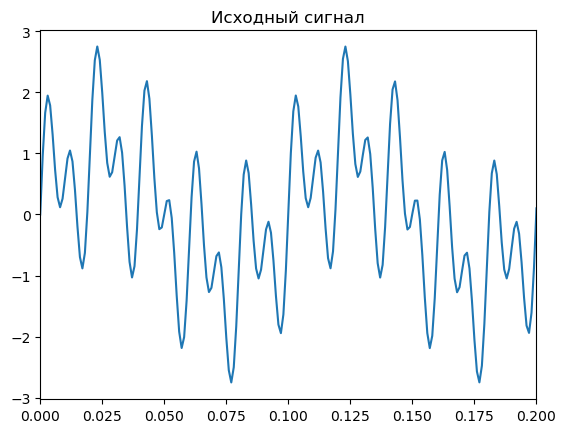

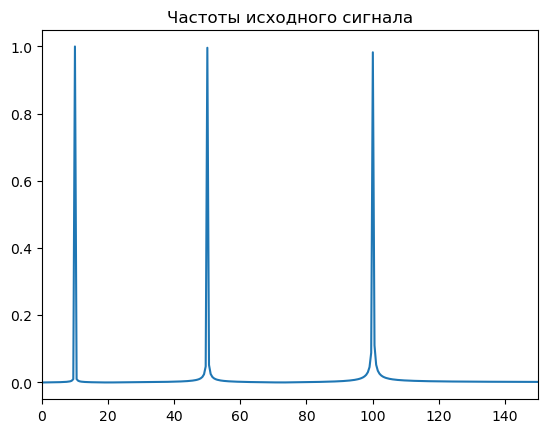

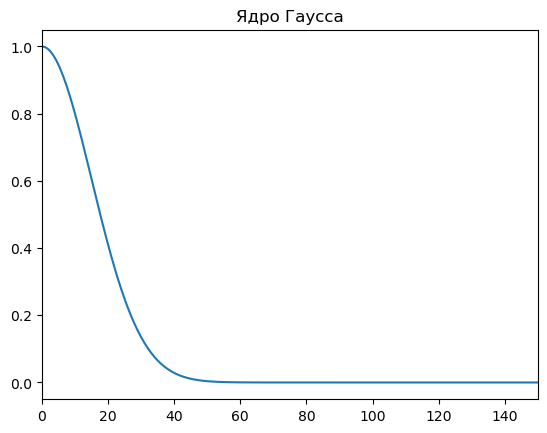

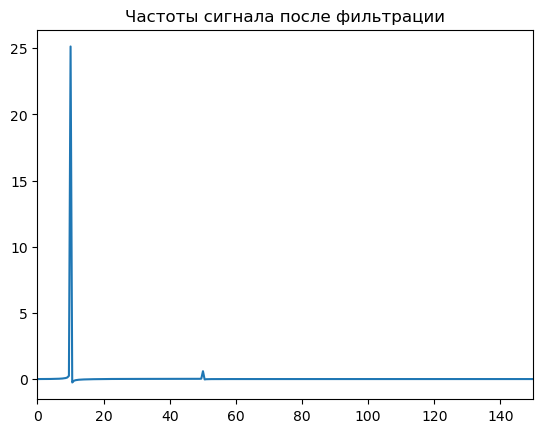

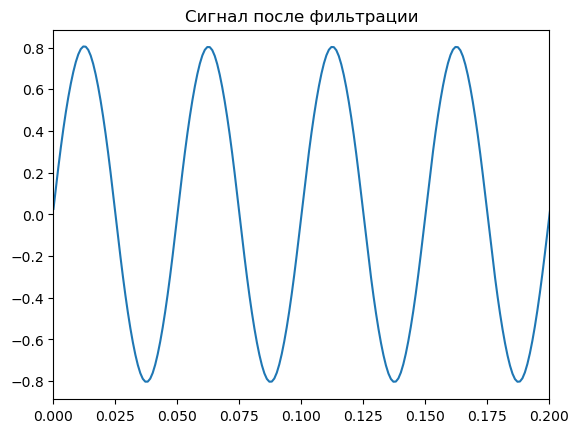

In [208]:
signal = lambda x: np.sin(10 * x * 2 * np.pi) + np.sin(50 * x * 2 * np.pi) + np.sin(100 * x * 2 * np.pi)

x_signal = np.linspace(0, N * T, N)
y_signal = signal(x_signal)
plt.plot(x_signal, y_signal)
plt.xlim(0, 0.2)
plt.title("Исходный сигнал")
plt.show()

x_fft_signal = np.linspace(0, max_freq / 2, N // 2)
y_fft_signal = fft.fft(y_signal)
plt.xlim(0, 150)
plt.plot(x_fft_signal, 2.0 / N * np.abs(y_fft_signal[0:N // 2]))
plt.title("Частоты исходного сигнала")
plt.show()

y_gauss = gauss(0, 15)(x_fft_signal)
plt.plot(x_fft_signal, y_gauss)
plt.xlim(0, 150)
plt.title("Ядро Гаусса")
plt.show()

y_fft_filtered = np.multiply(y_fft_signal[0:N // 2], y_gauss)
plt.plot(x_fft_signal, np.real(y_fft_filtered))
plt.xlim(0, 150)
plt.title("Частоты сигнала после фильтрации")
plt.show()

y_ifft_filtered = fft.ifft(y_fft_filtered)
plt.plot(x_signal[0:N // 2], np.real(y_ifft_filtered))
plt.xlim(0, 0.2)
plt.title("Сигнал после фильтрации")
plt.show()

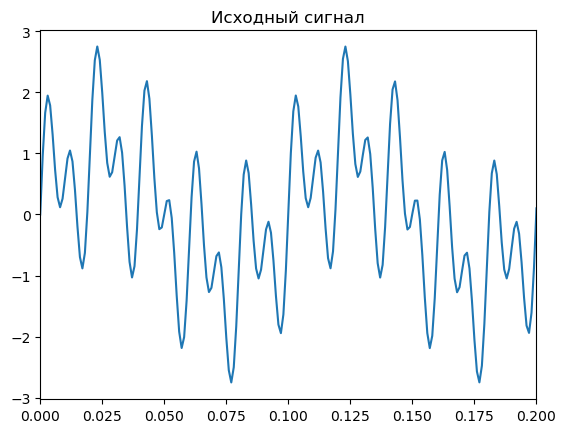

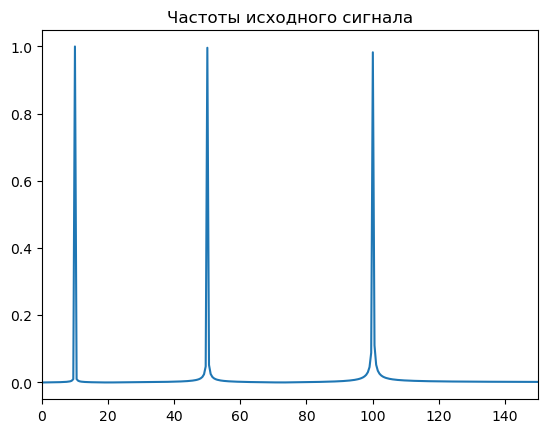

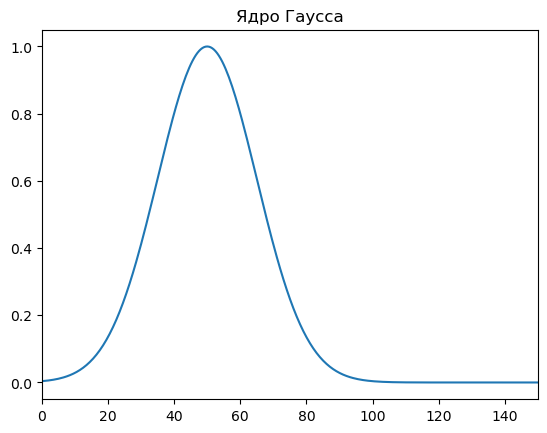

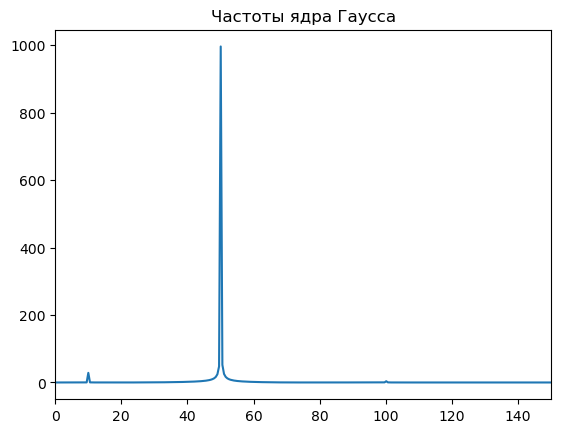

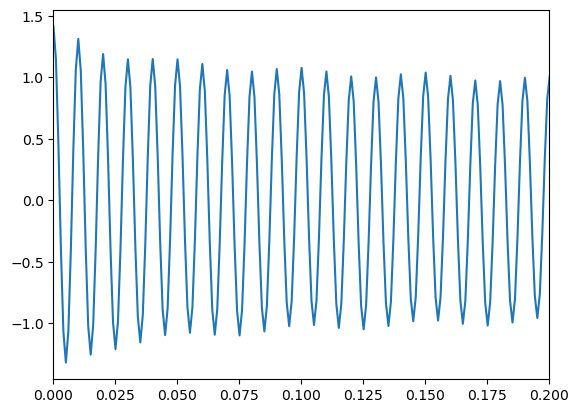

In [209]:
x_signal = np.linspace(0, N * T, N)
y_signal = signal(x_signal)
plt.plot(x_signal, y_signal)
plt.xlim(0, 0.2)
plt.title("Исходный сигнал")
plt.show()

x_fft_signal = np.linspace(0, max_freq / 2, N // 2)
y_fft_signal = fft.fft(y_signal)
plt.xlim(0, 150)
plt.plot(x_fft_signal, 2.0 / N * np.abs(y_fft_signal[0:N // 2]))
plt.title("Частоты исходного сигнала")
plt.show()

y_gauss = gauss(50, 15)(x_fft_signal)
plt.plot(x_fft_signal, y_gauss)
plt.xlim(0, 150)
plt.title("Ядро Гаусса")
plt.show()

y_fft_filtered = np.multiply(np.abs(y_fft_signal[0:N // 2]), y_gauss)
plt.plot(x_fft_signal, np.real(y_fft_filtered))
plt.xlim(0, 150)
plt.title("Частоты ядра Гаусса")
plt.show()

y_ifft_filtered = fft.ifft(y_fft_filtered)
plt.plot(x_signal[0:N // 2], np.real(y_ifft_filtered))
plt.xlim(0, 0.2)
plt.show()

### 6. (а) Реализовать полосовой фильтр через окно планка 

In [210]:
def plank_window_generator(eps, N):
    def plank_window(k):
        k = np.array(k, dtype=np.float64)
        out = np.zeros_like(k)
        z_a = lambda k: eps * (N - 1) * (1 / k + 1 / (k - eps * (N - 1)))
        z_b = lambda k: eps * (N - 1) * (1 / (N - 1 - k) + 1 / ((1 - eps) * (N - 1) - k))
        for i in range(len(k)):
            if k[i] == 0:
                out[i] = 0
            elif 0 < k[i] < eps * (N - 1):
                out[i] = 1 / (np.exp(z_a(k[i])) + 1)
            elif eps * (N - 1) <= k[i] <= (1 - eps) * (N - 1):
                out[i] = 1
            elif (1 - eps) * (N - 1) < k[i] < N - 1:
                out[i] = 1 / (np.exp(z_b(k[i])) + 1)
            elif k[i] == N - 1:
                out[i] = 0
        return out

    return plank_window

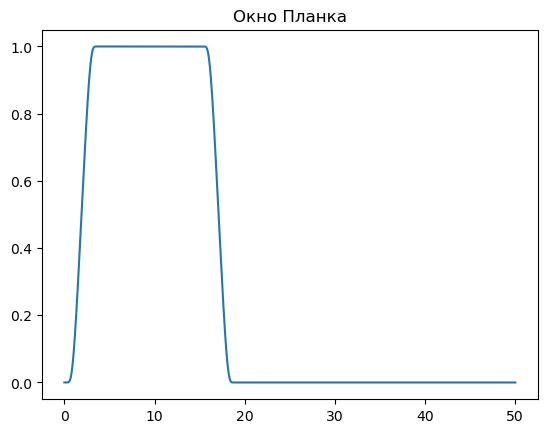

In [211]:
plank_window = plank_window_generator(0.2, 20)

freq = 100

x = np.linspace(0, 50, 50 * freq)
y = plank_window(x)
plt.plot(x, y)
plt.title("Окно Планка")
plt.show()

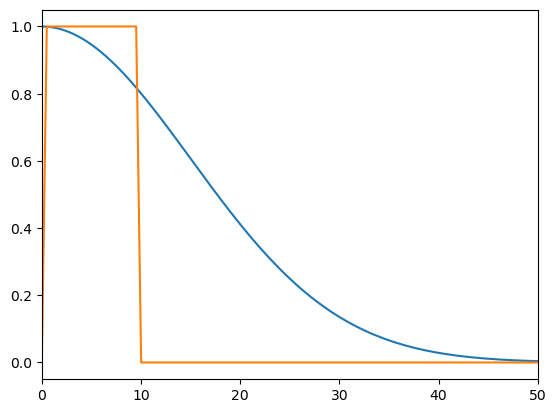

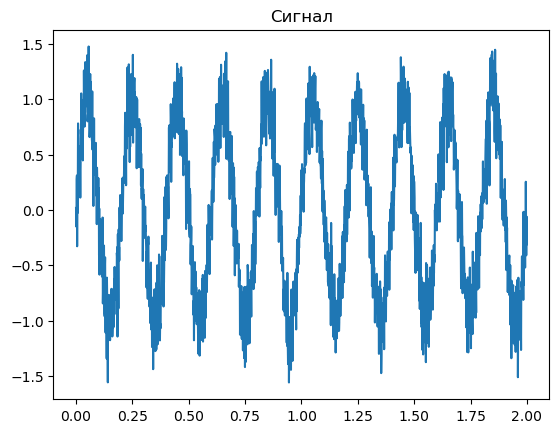

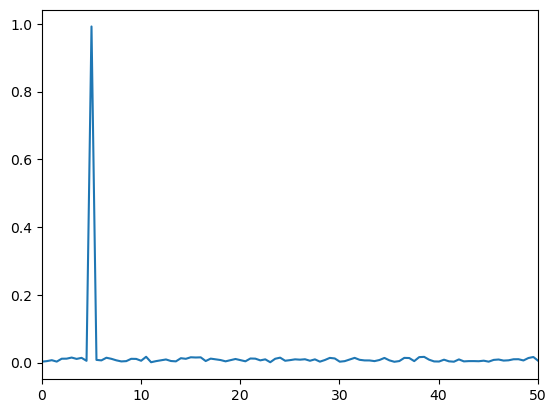

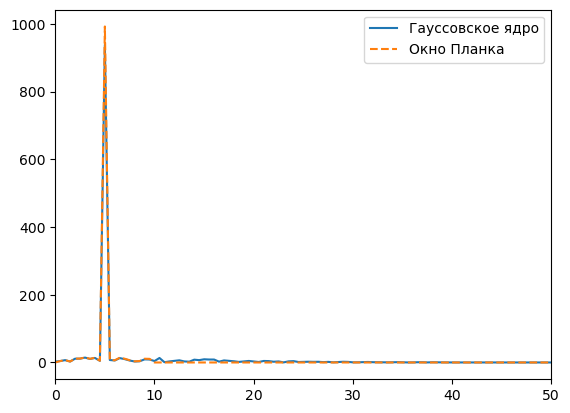

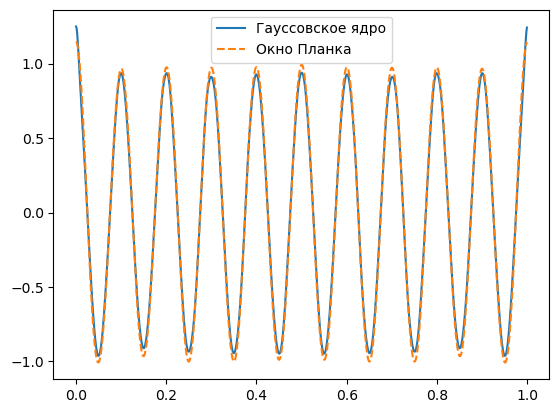

In [212]:
freq = 1000

gauss = gauss(0, 15)
plank = plank_window_generator(0.05, 11)

x_test = np.linspace(0, max_freq / 2, N // 2)
y_gauss = gauss(x_test)
y_plank = plank(x_test)
plt.plot(x_test, y_gauss)
plt.plot(x_test, y_plank)
plt.xlim(0, 50)
plt.show()

x = np.linspace(0, N * T, N)
y = np.sin(5 * x * 2 * np.pi) + np.random.normal(0, 0.2, N)
plt.plot(x, y)
plt.title('Сигнал')
plt.show()

xf = np.linspace(0, max_freq / 2, N // 2)
yf = fft.fft(y)
plt.plot(xf, 2.0 / N * np.abs(yf[0:N // 2]))
plt.xlim(0, 50)
plt.show()

y_fft_gauss = np.multiply(np.abs(yf[0:N // 2]), y_gauss)
y_fft_plank = np.multiply(np.abs(yf[0:N // 2]), y_plank)
plt.plot(xf, np.real(y_fft_gauss), label="Гауссовское ядро")
plt.plot(xf, np.real(y_fft_plank),linestyle='--', label="Окно Планка")
plt.xlim(0, 50)
plt.legend() 
plt.show()

y_ifft_gauss = fft.ifft(y_fft_gauss)
y_ifft_plank = fft.ifft(y_fft_plank)

plt.plot(x[0:1000], y_ifft_gauss, label="Гауссовское ядро")
plt.plot(x[0:1000], y_ifft_plank, linestyle='--', label="Окно Планка")
plt.legend() 
plt.show()